In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
from konlpy.tag import Okt

In [ ]:
plt.figure(figsize=(12,5))
plt.boxplot([cjd],
            labels = ['Word'],
            showmeans=True)

In [30]:
import pandas as pd

In [44]:
d= pd.read_csv("/Users/KBS/Documents/CNU_Everytime_SentimentAnalysis/donga/donga_word.csv",sep="\t",encoding="utf-8")

In [45]:
j= pd.read_csv("/Users/KBS/Documents/CNU_Everytime_SentimentAnalysis/joogang/joogang_word.csv",sep="\t",encoding="utf-8")

In [46]:
c = pd.read_csv("/Users/KBS/Documents/CNU_Everytime_SentimentAnalysis/chosun/chosun_word.csv",sep="\t",encoding="utf-8")

In [70]:
d_p = d[d['section'].str.contains('Politics')] ####
j_p = j[j['section'].str.contains('정치')] ####
c_p = c[c['section'].str.contains('정치')] ####

In [71]:
dj = pd.concat([d_p, j_p], axis = 0)

In [72]:
cjd = pd.concat([dj, c_p], axis = 0)


In [50]:
cjd = cjd.drop(columns=['section'], axis=1)

In [51]:
stopword = ['대한', '당시', '기준', '때문', '한편', '작년', '상황', '사건','통해','관련','오전','이상','지난해','기자','경우', '생각', '모습', '인상', '이번', '스포츠조선', '이후', '올해', '관련', '자신', '우리', '통해', '사진', '라며', '인상', '사람', '지난', '위해', '남자', '여자', '지난','대해','위해','통해','오전','오후']
s=""
for i in stopword:
    s+=i
    s+="|"
datafilter = cjd["word"].str.contains(s[:-1])



In [52]:
cjd = cjd[~datafilter]
cjd = cjd.nlargest(n=100,columns='count',keep='first')
cjd = dict(zip(cjd['word'].tolist(), cjd['count'].tolist()))


In [55]:
wc = WordCloud(
    font_path= '/Library/Fonts/NotoSansKR-Bold.otf',
    background_color='white',
    width=1600,
    height=1600)

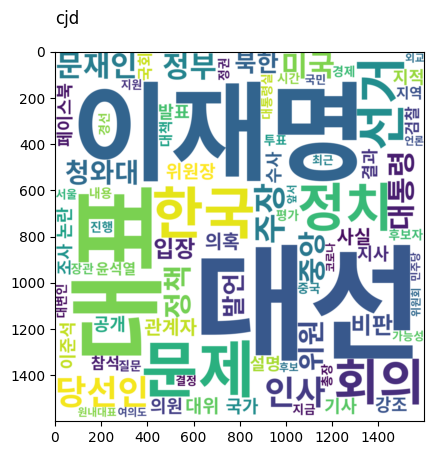

In [57]:
wc_img = wc.generate_from_frequencies(cjd) #

def grey_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(10,10%%, %d%%)" % np.random.randint(1,100))   ## 색상코드/숫자를 조정해보세요
                                                            ## hsl 색상코드 참고
plt.title('cjd', loc='left', pad=20)

wc_img.to_file('cjd.jpg') ##########@@@@@@@@@@@@@@@@@@@@
plt.imshow(wc, interpolation = 'bilinear')

# 경제

In [58]:
d_e = d[d['section'].str.contains('Economy')] ####
j_e = j[j['section'].str.contains('경제')] ####
c_e = c[c['section'].str.contains('경제')] ####

In [59]:
dj_e = pd.concat([d_e, j_e], axis = 0)
cjd_e = pd.concat([dj_e, c_e], axis = 0)


In [63]:
cjd_e = cjd_e.drop(columns=['section'], axis=1)

In [66]:
stopword = ['대한', '당시', '기준', '때문', '한편', '작년', '상황', '사건','통해','관련','오전','이상','지난해','기자','경우', '생각', '모습', '인상', '이번', '스포츠조선', '이후', '올해', '관련', '자신', '우리', '통해', '사진', '라며', '인상', '사람', '지난', '위해', '남자', '여자', '지난','대해','위해','통해','오전','오후']
s=""
for i in stopword:
    s+=i
    s+="|"
datafilter = cjd_e["word"].str.contains(s[:-1])


In [67]:
cjd_e = cjd_e[~datafilter]
cjd_e = cjd_e.nlargest(n=100,columns='count',keep='first')
cjd_e = dict(zip(cjd_e['word'].tolist(), cjd_e['count'].tolist()))

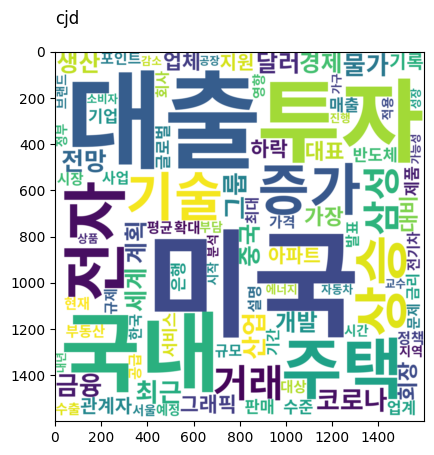

In [68]:
wc_img = wc.generate_from_frequencies(cjd_e) #

plt.title('cjd', loc='left', pad=20)

wc_img.to_file('cjd_e.jpg') ##########@@@@@@@@@@@@@@@@@@@@
plt.imshow(wc, interpolation = 'bilinear')